# Project Description

The project analyzes the question Does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch? That the team at FiveThirtyEight was interested in while waiting for Star Wars: The Force Awakens.

The dataset used in this project is provided by [FiveThirtyEight](https://www.fivethirtyeight.com/). The dataset was created with SurveyMonkey and can be accessed [here](https://github.com/fivethirtyeight/guns-data).  

# Import Libaries

In [35]:
import io
import os
import urllib.request

from IPython.display import display

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# Set Global Varibles

In [36]:
URL = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/star-wars-survey/StarWars.csv'
PATH_DATASET = 'data/' + URL.split('/')[-1]

# Project Preperation

## Download the data

In [37]:
def download_github_csv_data(url):
    """Download a csv file and stores it in the data folder of the project repository.

    Args:
        URL of the csv file

    Returns:
        None
    """
    ### Create data dir if not exts
    if not os.path.exists('data/'):
        os.makedirs('data/')

    file = urllib.request.urlopen(url)

    df = pd.read_csv(io.TextIOWrapper(file))

    filename = url.split('/')[-1]
    path = 'data/' + filename
    df.to_csv(path, header=True, index=False, sep=',')

"""
Downloads the data to the data folder of a local repository after you run it once you can uncomment this lines.
To prevent the code from downloading the data every time you run the code.
"""            
download_github_csv_data(URL)

## Load the guns dataset

In [38]:
### Load the data as df in the var data
data = pd.read_csv(PATH_DATASET, encoding="ISO-8859-1")
### Inspect the first 5 rows of the dataset
display(data.head())

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


# Analysis

## Inspect column names

In [39]:
print(data.columns)

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

## Remove entries with missing RespondentID

In [40]:
### Assume that entries with out the anonymized ID of the person taking the survey are invalid
data['RespondentID'] = pd.notnull(data['RespondentID'])
display(data.head())

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,False,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,True,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,True,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,True,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,True,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Map boolean values in the columns Have you seen any of the 6 films in the Star Wars franchise? and Do you consider yourself to be a fan of the Star Wars film franchise  to yes and no

In [41]:
map_yes_no = {
    'Yes': True,
    'No': False
}
data['Have you seen any of the 6 films in the Star Wars franchise?'] = \
data['Have you seen any of the 6 films in the Star Wars franchise?'].map(map_yes_no)

data['Do you consider yourself to be a fan of the Star Wars film franchise?'] = \
data['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(map_yes_no)

display(data.head())

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,False,NaN,NaN,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,True,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,True,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,True,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Map the values if a movie was seen to boolean and rename these columns

In [42]:
data = data.rename(columns={
    data.columns[3] : 'seen_1',
    data.columns[4] : 'seen_2',
    data.columns[5] : 'seen_3',
    data.columns[6] : 'seen_4',
    data.columns[7] : 'seen_5',
    data.columns[8] : 'seen_6'
})

data['seen_1'] = data['seen_1'].map({'Star Wars: Episode I  The Phantom Menace': True, np.nan: False})
data['seen_2'] = data['seen_2'].map({'Star Wars: Episode II  Attack of the Clones': True, np.nan: False})
data['seen_3'] = data['seen_3'].map({'Star Wars: Episode III  Revenge of the Sith': True, np.nan: False})
data['seen_4'] = data['seen_4'].map({'Star Wars: Episode IV  A New Hope': True, np.nan: False})
data['seen_5'] = data['seen_5'].map({'Star Wars: Episode V The Empire Strikes Back': True, np.nan: False})
data['seen_6'] = data['seen_6'].map({'Star Wars: Episode VI Return of the Jedi': True, np.nan: False})

display(data.head())

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,False,NaN,NaN,True,True,True,True,True,True,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,True,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,True,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,True,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,True,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Rename the ranking columns and convert them to numeric

In [50]:
data = data.rename(columns={
        "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
        "Unnamed: 10": "ranking_2",
        "Unnamed: 11": "ranking_3",
        "Unnamed: 12": "ranking_4",
        "Unnamed: 13": "ranking_5",
        "Unnamed: 14": "ranking_6"
        })

data[data.columns[9:15]] = data[data.columns[9:15]].apply(pd.to_numeric, errors='coerce')

display(data.head())

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,False,NaN,NaN,True,True,True,True,True,True,NaN,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,True,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,True,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,True,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,True,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Compute the mean rating per star wars movie

In [51]:
print(data[data.columns[9:15]].mean())

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64


## Plot the mean rating

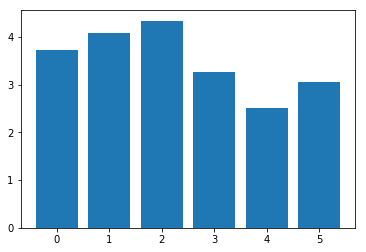

In [52]:
plt.bar(range(6), data[data.columns[9:15]].mean())
plt.show()

## Results

It shows that the new movies rated better than the old.

## Compute the number of people that saw a movie

In [53]:
data[data.columns[3:9]].sum()

seen_1    674
seen_2    572
seen_3    551
seen_4    608
seen_5    759
seen_6    739
dtype: int64

## Plot the number of people saw one movie

<Container object of 6 artists>

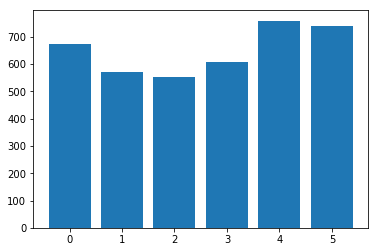

In [54]:
plt.bar(range(6), data[data.columns[3:9]].sum())

## Results

It show that more people saw the old movies.

## Invetigate difference in gender

In [55]:
### Split the data in female and male dfs
males = data[data["Gender"] == "Male"]
females = data[data["Gender"] == "Female"]

## Plot gender difference in the ratings

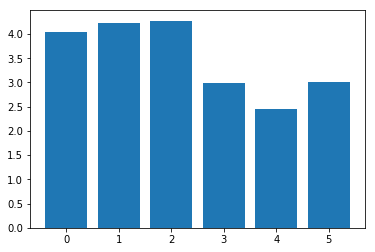

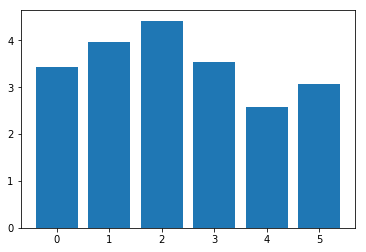

In [56]:
plt.bar(range(6), males[males.columns[9:15]].mean())
plt.show()

plt.bar(range(6), females[females.columns[9:15]].mean())
plt.show()

## Results

It shows that women like the new star movies more than men.

## Plot gender difference in seen count

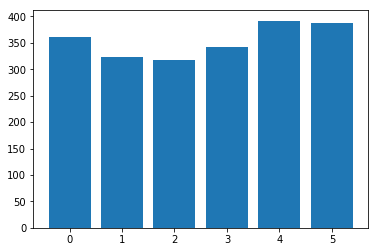

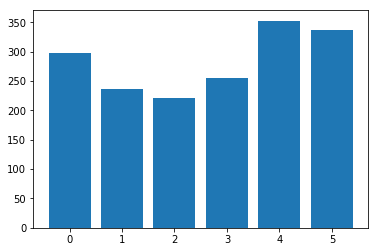

In [57]:
plt.bar(range(6), males[males.columns[3:9]].sum())
plt.show()

plt.bar(range(6), females[females.columns[3:9]].sum())
plt.show()

## Results

It shows that more males watched the first 3 episodes.